# misc/julia

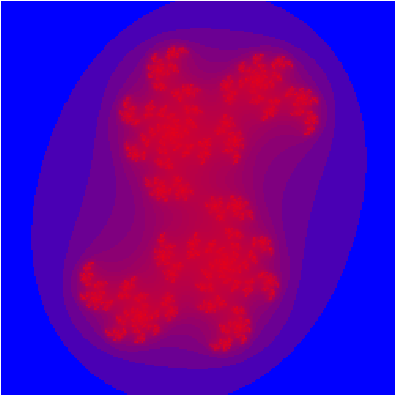

In [1]:
# contributed by Stefan Schenk

from io import BytesIO
from math import sqrt
from pyx import *

xiterations = yiterations = 250
Min_Im = -1.5
Max_Im = 1.5
Min_Re = -1.5
Max_Re = 1.5
c = 0.41 + 0.3j
p = color.gradient.RedBlue

def rgbcolortostring(c):
    return bytes([int(255*c.r), int(255*c.g), int(255*c.b)])

data = BytesIO()

# compute fractal
for y in range(yiterations):
    for x in range(xiterations):
        z = complex(1.0*(Max_Re-Min_Re)*x/xiterations + Min_Re,
                    1.0*(Max_Im-Min_Im)*y/yiterations + Min_Im)

        for k in range(256):
            z = z*z + c
            if abs(z) > 2:
                # append color(RGB) of the current pixel to the end of data
                data.write(rgbcolortostring(p.getcolor(1.0/sqrt(k+1))))
                break
        else:
            data.write(b"\0\0\0")

# generate image from data
julia = bitmap.image(xiterations, yiterations, "RGB", data.getvalue())
juliabitmap = bitmap.bitmap(0, 0, julia, height=10)

c = canvas.canvas()
c.insert(juliabitmap)
c